In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset saved in tab seperated values format
df = pd.read_csv('Titanic.csv',sep="\t")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning & ANalysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
#Column names in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Passenger ID is the ID of Passenger Travelled.

Survived: It gives the information about the passenger whether survived the incident or not

PClass : It gives the passenger travelled class

Name & Age : These columns gives the Name and age details of the passengers

Sex: Gender information of the passenger



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 12 columns and 891 rowsin the datA SET

In [7]:
#to know the data types of the datset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

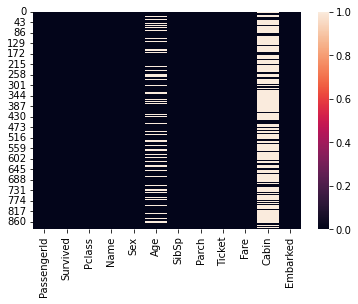

In [10]:
#to check missing values
sns.heatmap(df.isnull())

tHERE are 177 null values in the Age column

687 null values in cabin column

The age column values can be replaced with the mean of the age column

THere are 687 values of Cabin column are null values, which is almost 80% of the data., so its better to leave this column untreated or removed

In [11]:
#Checking if there are any white spaces in the datasets
df.loc[df["PassengerId"]==' ']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are No blank / white spaces in the dataset

In [12]:
df.loc[df["Cabin"]==" "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#null value rows in the Embarked column
df[df['Embarked'].isnull()].index.tolist()

[61, 829]

In [15]:
#unique values in the embarked column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df['Embarked'][61]

nan

In [17]:
df['Embarked'][829]

nan

The 61 and 829 rows of the Embarked column are 'nan'

In [18]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [19]:
np.where(df['Age'].isnull() == True)[0]

array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888], dtype=int64)

In [20]:
#Lets check few random rows of the age column
df['Age'][28]

nan

In [21]:
df['Age'][732]

nan

In [22]:
df['Age'][593]

nan

The above index values of the Age column are nan, we can replace them with mean values of the column

In [23]:
#unique vales in the cabin column
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
np.where(df['Cabin'].isnull() == True)[0]

array([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  22,  24,  25,  26,  28,  29,  30,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  53,  56,  57,  58,  59,  60,  63,  64,  65,
        67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  93,  94,  95,
        98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112,
       113, 114, 115, 116, 117, 119, 120, 121, 122, 125, 126, 127, 129,
       130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145,
       146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 175, 176,
       178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 210,
       211, 212, 213, 214, 216, 217, 219, 220, 221, 222, 223, 22

In [25]:
#lets check whats in these null value indexes
df['Cabin'][437]

nan

In [26]:
df['Cabin'][816]

nan

#alll the above index values are nan and those are 687, which is more than 80% of the dataset, so we will remove this column "cabin"

# Handling Null Values

In [27]:
#removing the cabin column
df=df.drop(columns="Cabin", axis=1)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Cabin column is dropped

Now we need to replace the null values in the age column by either mean of the column


In [29]:
#Mean of the Age column
df["Age"].mean()

29.69911764705882

In [30]:
#Replacing the null/nan values of age column with mean of the age column
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [31]:
#checking the previously checked age column values, whether it is replaced with mean or not
df['Age'][593]

29.69911764705882

 Nan Values in the Age column are replaced with mean of the age column

In [32]:
#Mode of embarked column
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [33]:
#Replacing the null/nan values of Embarked column with mode of the Embarked column
df["Embarked"].fillna(df["Embarked"].mode(),inplace=True)

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All The nan values are replaced with mode / mean of the respective columns

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data Visualisation

Text(0.5, 1.0, 'Embarked')

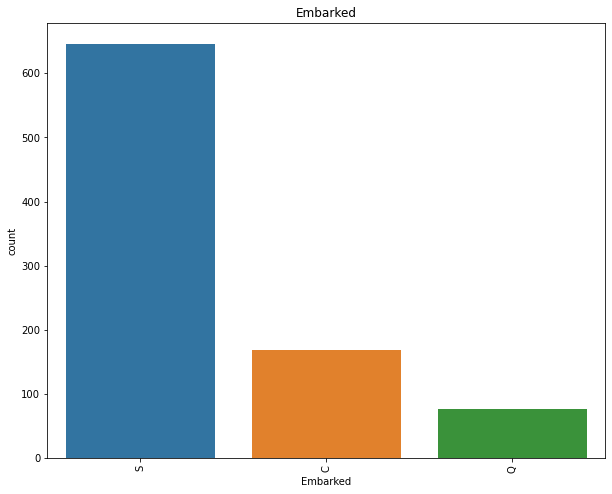

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(df['Embarked'])
plt.xticks(rotation = 90)
plt.title('Embarked')

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

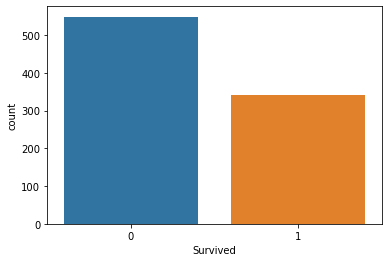

In [39]:
#Count Plot for "Survived" column
print(df["Survived"].value_counts())

sns.countplot("Survived",data=df)

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

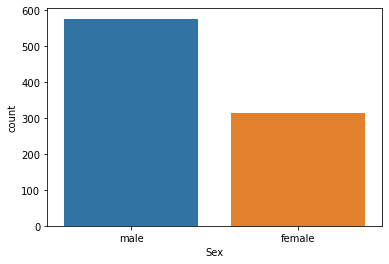

In [40]:
#Count Plot for "Sex" column
print(df["Sex"].unique())
print(df["Sex"].value_counts())

sns.countplot("Sex",data=df)

Total Number of 577 Male present &it is more than Total Number of Female i.e 314 present in Titanic

<AxesSubplot:xlabel='Sex', ylabel='count'>

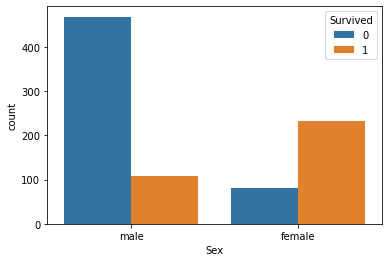

In [41]:
#Comparative checking of the male & female survivors

sns.countplot("Sex", hue="Survived", data=df)

There are more female survivors than the male survivors

[3 1 2] 

Total no of people in All Pclass are: 

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

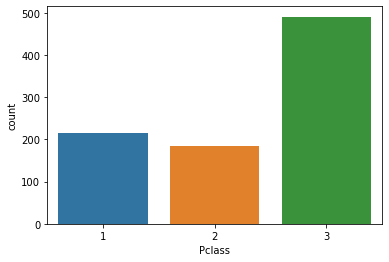

In [42]:
#Count Plot of "Pclass" Column
print((df["Pclass"].unique()),"\n")
print("Total no of people in All Pclass are:","\n")
print(df["Pclass"].value_counts())
sns.countplot("Pclass",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

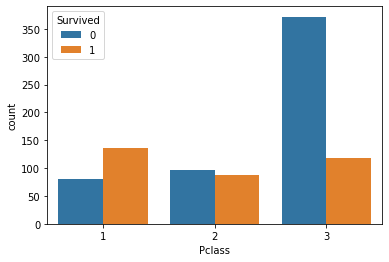

In [43]:
#Count Plot for Survived people in "Pclass"  column
sns.countplot("Pclass", hue="Survived", data=df)

['S' 'C' 'Q'] 

Total no: 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

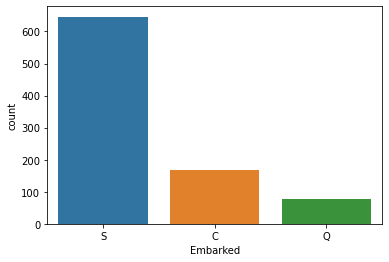

In [44]:
#Count Plot of "Pclass" Column
print((df["Embarked"].unique()),"\n")
print("Total no:","\n")
print(df["Embarked"].value_counts())

sns.countplot("Embarked",data=df)

The count of people in S-embarked are more than thrice of the other two embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

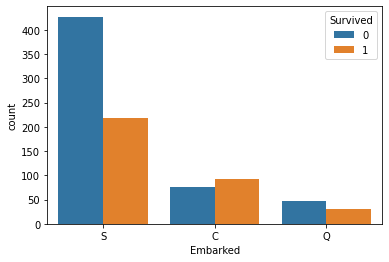

In [45]:
#Count Plot for Survived people in "Embarked" column
sns.countplot("Embarked",hue="Survived",data=df)

[0 1 2 5 3 4 6] 

Total no: 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

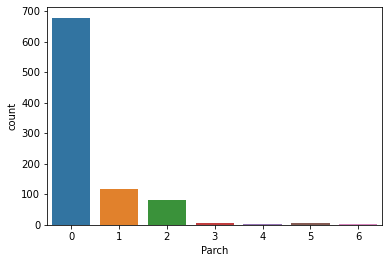

In [46]:
#Count Plot of "Parch" Column
print((df["Parch"].unique()),"\n")
print("Total no:","\n")
print(df["Parch"].value_counts())

sns.countplot("Parch",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

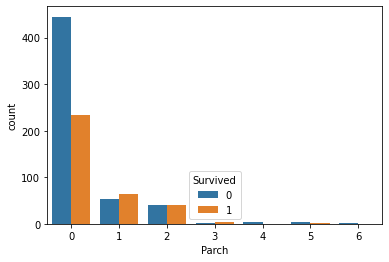

In [47]:
#Count Plot for Survived people in "parch" column
sns.countplot("Parch",hue="Survived",data=df)

<Figure size 1080x720 with 0 Axes>

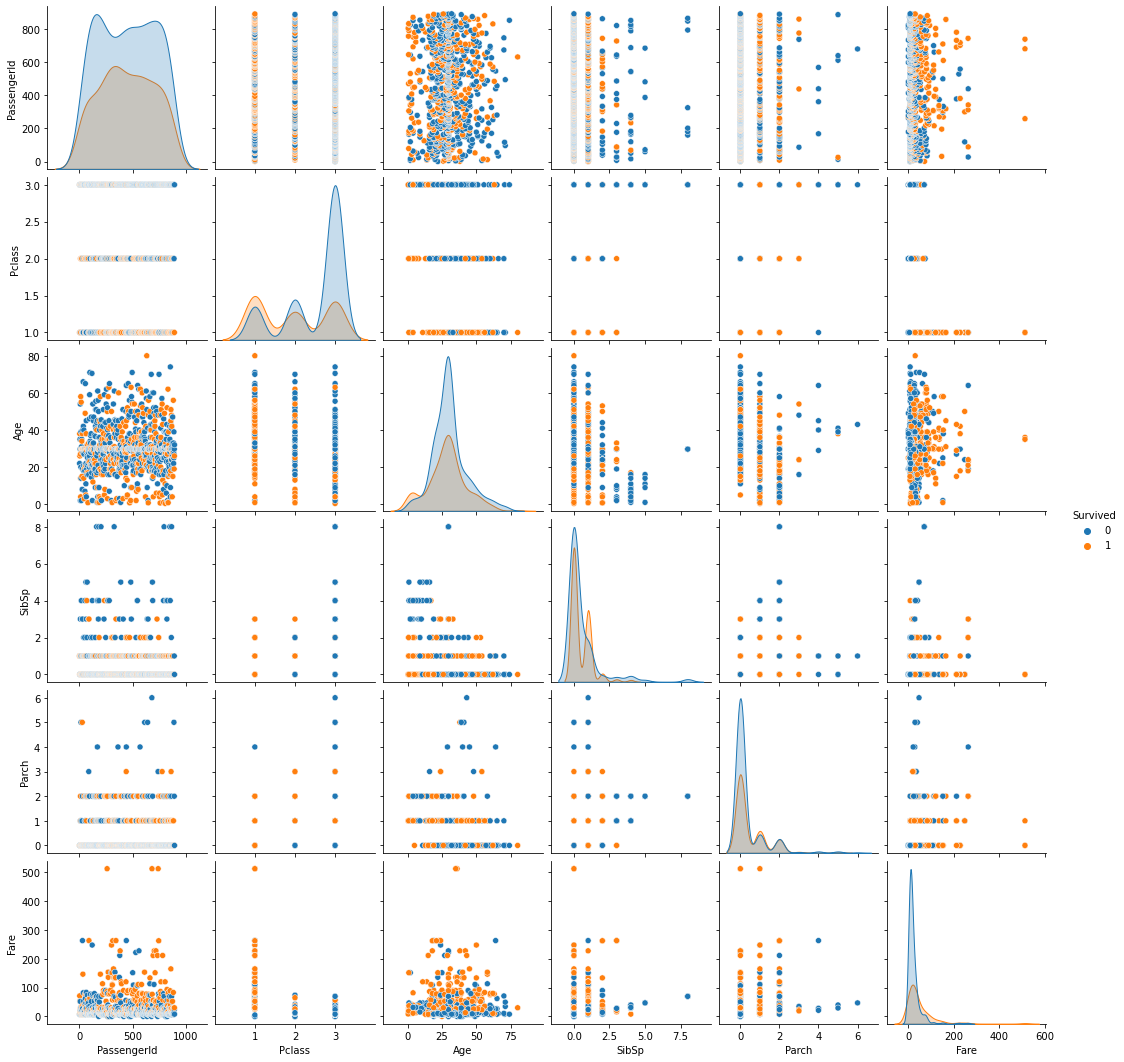

In [48]:
#lets check the survived column relation with the other columns with pair plot

plt.figure(figsize=(15,10))
sns.pairplot(data=df,hue="Survived")

Lets check the correlation of all the columns in  numbers

In [49]:
# Describing Data : works only on continuous column and do not work on categorical column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


NAME Column has no relatiojn with the survival 
Ticket Number & Passenger ID are also have no relation with the survival column,


SO we will drop these columns

In [51]:
#removing the PassengerId column
df=df.drop(columns="PassengerId", axis=1)

In [52]:
#removing the Name column
df=df.drop(columns="Name", axis=1)

In [53]:
#removing the Ticket column
df=df.drop(columns="Ticket", axis=1)

In [54]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Correlation

In [55]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Check the heatmap of the correlation

In [56]:
df.corr()["Survived"].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

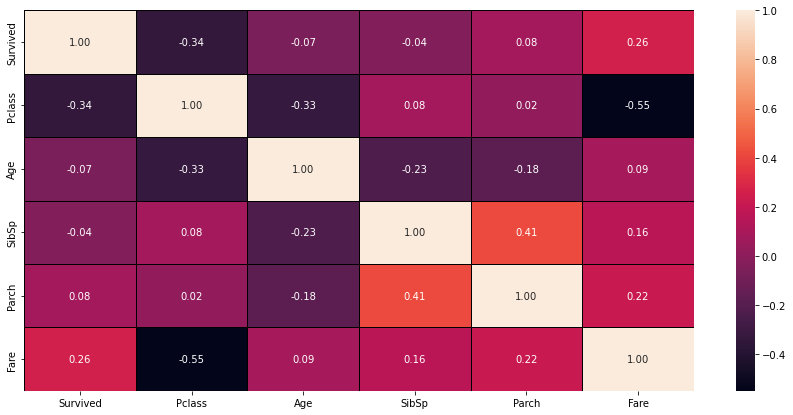

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

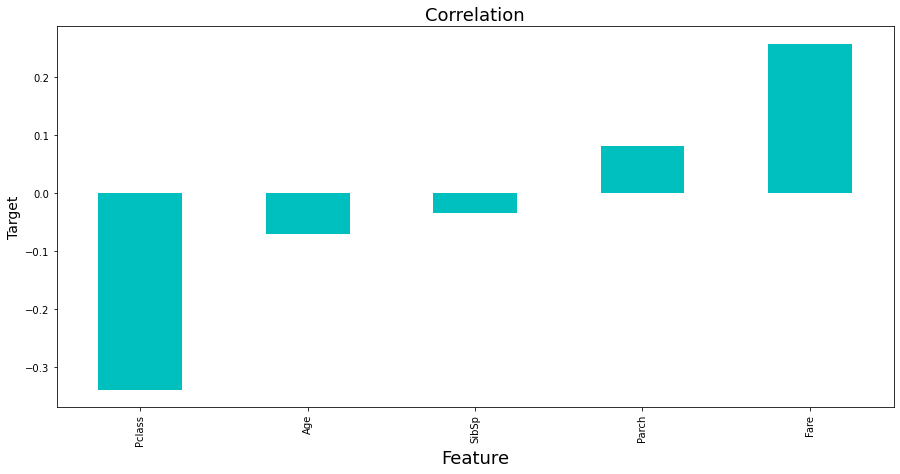

In [58]:
plt.figure(figsize=(15,7))
df.corr()['Survived'].sort_values(ascending=True).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From the Above We can clearly see that Pclass,Age,SibSp are negatively correlated to Survived column

and Fare, PArch are positively correklated with the survived

We need to change the Embarked and sex columns into numerical by encoding

# Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [60]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [61]:
#Converting "Sex" column data which contains categorical data into continuous data.
#transforming/encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [62]:
#Converting "Sex" column data which contains categorical data into continuous data.
df['Sex']=encoder.fit_transform(df['Sex'])
df["Sex"].unique()

array([1, 0])

In [63]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [64]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [65]:
#Converting "Embarked" column data which contains categorical data into continuous data.
df['Embarked']=encoder.fit_transform(df['Embarked'])
df["Embarked"].unique()

array([2, 0, 1])

In [66]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Checking outliers with boxplot

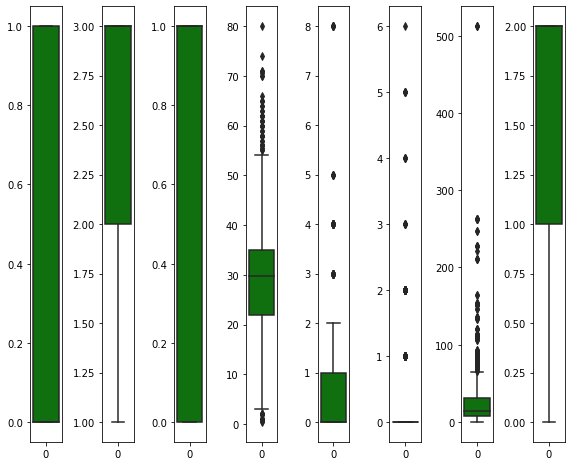

In [67]:
lists=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(lists)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[lists[i]],color='green',orient='v')
    plt.tight_layout()

Survived       AxesSubplot(0.125,0.125;0.0824468x0.755)
Pclass      AxesSubplot(0.223936,0.125;0.0824468x0.755)
Sex         AxesSubplot(0.322872,0.125;0.0824468x0.755)
Age         AxesSubplot(0.421809,0.125;0.0824468x0.755)
SibSp       AxesSubplot(0.520745,0.125;0.0824468x0.755)
Parch       AxesSubplot(0.619681,0.125;0.0824468x0.755)
Fare        AxesSubplot(0.718617,0.125;0.0824468x0.755)
Embarked    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

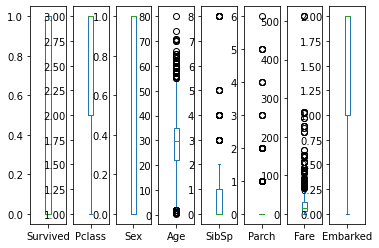

In [68]:
df.plot(kind='box',subplots=True,layout=(1,8))

Pclass


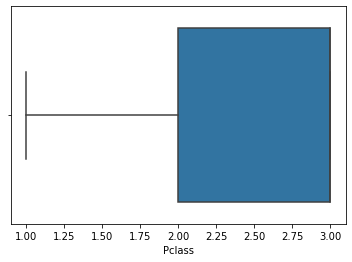

Sex


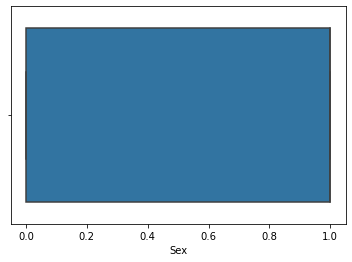

Age


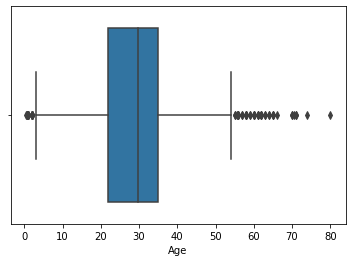

SibSp


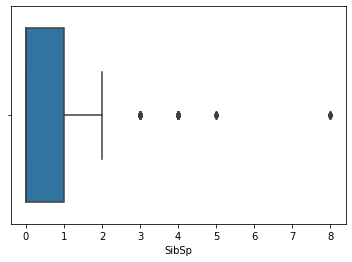

Parch


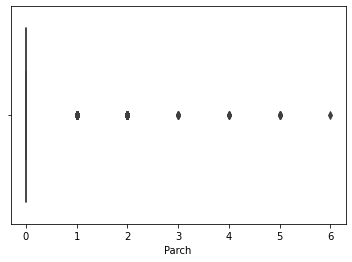

Fare


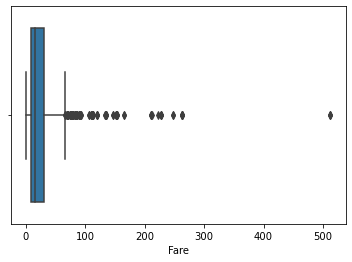

Embarked


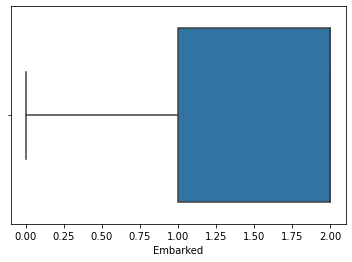

In [69]:
# Now check outliers in data
Ns = ['Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
for x in Ns:
    print(x)
    plt.plot()
    plt.plot(figsize=(7,9))
    sns.boxplot(df[x])
    plt.show()

There ARE OUTLIERS IN AGE,FARE COLUMN
Remaing outlier columns are categorical

# Removing Outliers

# ZSCORE method

In [70]:
from scipy.stats import zscore

In [71]:
variables = df[['Age','Fare']]

z=np.abs(zscore(variables))

# Creating new dataframe
dfn = df[(z<3).all(axis=1)]
dfn.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [72]:
z.head()

,Age,Fare
0,0.592481,0.502445
1,0.638789,0.786845
2,0.284663,0.488854
3,0.407926,0.420730
4,0.407926,0.486337


In [73]:
len(np.where(z>3)[0])

27

In [74]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])

Old DataFrame data in Rows and Column: (891, 8)
New DataFrame data in Rows and Column: (864, 8)
Total Dropped rows: 27


% data loss by the zscore method

In [75]:
loss_percent=(891-864)/891*100
print(loss_percent,"%")

3.0303030303030303 %


Data loss by the zscore method is 3%

# IQR method

In [76]:
#1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [77]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",dfs.shape)
print("\nTotal Dropped rows:",df.shape[0]-dfs.shape[0])

Old DataFrame data in Rows and Column: (891, 8)

New DataFrame data in Rows and Column: (721, 8)

Total Dropped rows: 170


DAta loss in IQR method

In [78]:
loss_perc = (891-721)/891*100
loss_perc

19.07968574635241

Thre is 19% data loss in the IQR method so, we will opt for Zscore method

In [79]:
#Data set from zscore method is dfn
dfn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


# Checking for the skewness

In [80]:
dfn.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       3.751753
Parch       2.840412
Fare        2.257178
Embarked   -1.328443
dtype: float64

Data visualization of skewed continuous column using distplot

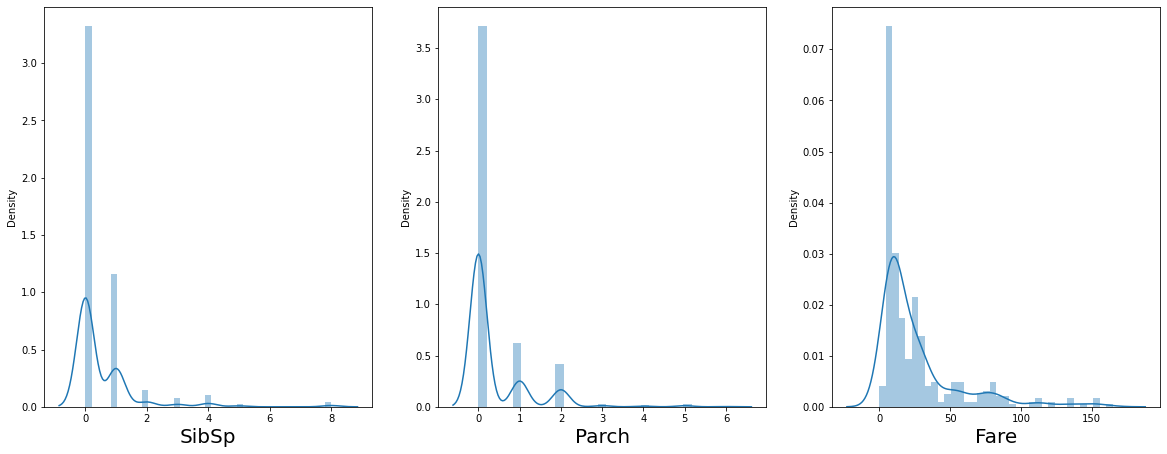

In [81]:
collist=["SibSp", "Parch", "Fare"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dfn[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing skewness using yeo-johnson method

In [82]:
from sklearn.preprocessing  import power_transform

In [83]:
collist=["SibSp", "Parch", "Fare"]
dfn[collist]=power_transform(dfn[collist],method='yeo-johnson')
dfn[collist]

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493
...,...,...,...
886,-0.680931,-0.548637,-0.279691
887,-0.680931,-0.548637,0.607981
888,1.374574,1.879004,0.345275
889,-0.680931,-0.548637,0.607981


In [84]:
dfn.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
Embarked   -1.328443
dtype: float64

# Checking skewness after removal through data visualization using distplot

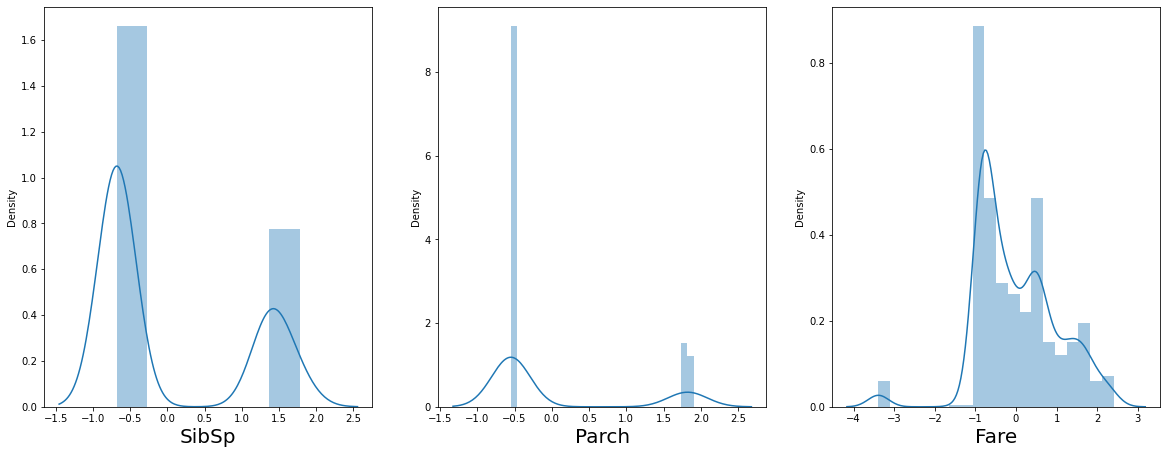

In [85]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dfn[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Skewness gor removed when compared to the old data

# Data preprocessing

# Spliting data into Target and Features:

In [86]:
x=dfn.drop("Survived",axis=1)
y=dfn["Survived"]

In [87]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.374574,-0.548637,-0.882769,2
1,1,0,38.0,1.374574,-0.548637,1.529038,0
2,3,0,26.0,-0.680931,-0.548637,-0.792444,2
3,1,0,35.0,1.374574,-0.548637,1.216581,2
4,3,1,35.0,-0.680931,-0.548637,-0.776493,2


In [88]:
x.shape

(864, 7)

In [89]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
y.shape

(864,)

In [91]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

as the survived are 327 and non survived are 537 ,The data set is not balanced 

so we will use oversampling method for balancing

# Oversampling using the SMOTE

In [92]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [93]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [94]:
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

Now the data set is balanced

<AxesSubplot:xlabel='Survived', ylabel='count'>

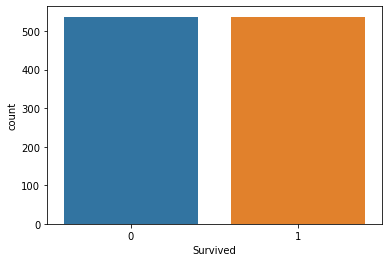

In [95]:
#checking through visualization also
sns.countplot(y)

# Scaling data using Min-Max Scaler

In [96]:
x.shape, y.shape

((1074, 7), (1074,))

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [99]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.432617,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.848336,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.448186,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.794478,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.450936,1.0


Now the data is scaled

# Model 

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
#to get the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8668730650154799  on Random_state  102


Accuracy is 86% at random state 102

# Creating train-test-split

In [102]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [103]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((751, 7), (751,), (323, 7), (323,))

In [104]:
x.shape, y.shape

((1074, 7), (1074,))

# Classification Algorithms

# Logistic Regression

In [105]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test,pred_lr))

0.8173374613003096
[[141  31]
 [ 28 123]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       172
           1       0.80      0.81      0.81       151

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



# Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

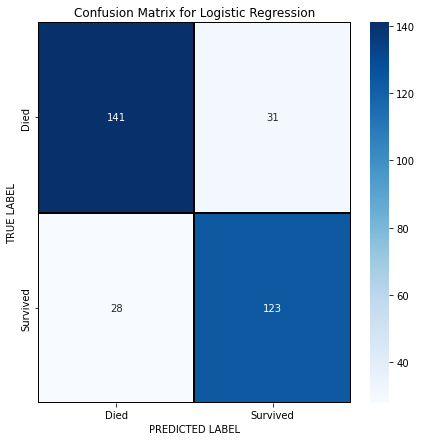

In [106]:
cm = confusion_matrix(y_test,pred_lr)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

# Decision Tree Classifier

In [107]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8668730650154799
[[153  19]
 [ 24 127]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       172
           1       0.87      0.84      0.86       151

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



# Confusion Matrix for DTC

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

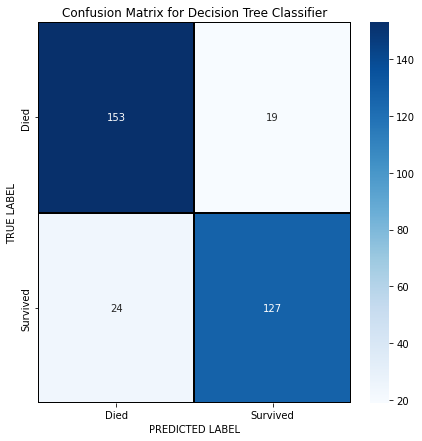

In [108]:
cm = confusion_matrix(y_test,pred_dtc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

# Random Forest Classifier

In [109]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8668730650154799
[[147  25]
 [ 18 133]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       172
           1       0.84      0.88      0.86       151

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



# Confusion Matrix for Random Forest Classifier

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

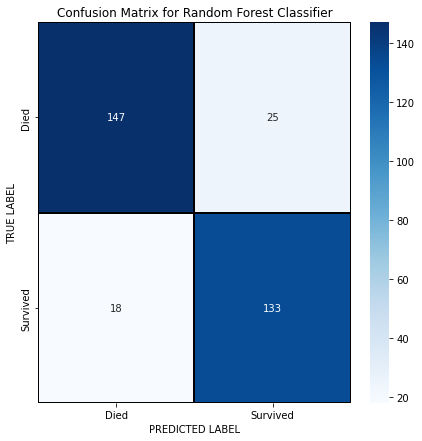

In [110]:
cm = confusion_matrix(y_test,pred_rfc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

# Support Vector Machine Classifier

In [111]:
svc = SVC(kernel='linear', gamma=3)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print(accuracy_score(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

0.8173374613003096
[[147  25]
 [ 34 117]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       172
           1       0.82      0.77      0.80       151

    accuracy                           0.82       323
   macro avg       0.82      0.81      0.82       323
weighted avg       0.82      0.82      0.82       323



# Confusion Matrix for SVC

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

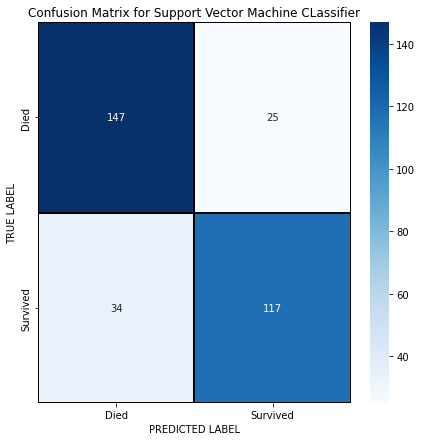

In [112]:
cm = confusion_matrix(y_test,pred_svc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

# KNN Classifier

In [113]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test,pred_knn))

0.8297213622291022
[[140  32]
 [ 23 128]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       172
           1       0.80      0.85      0.82       151

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



# Confusion Matrix for KNN classifier

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

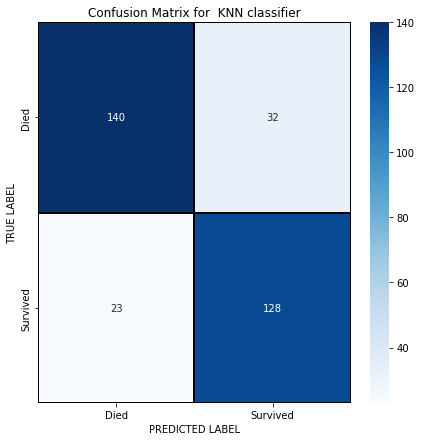

In [114]:
cm = confusion_matrix(y_test,pred_knn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

# Gradient Boosting Classifier

In [115]:
gb = GradientBoostingClassifier(n_estimators =300,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print(accuracy_score(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
print(classification_report(y_test,pred_gb))

0.8297213622291022
[[141  31]
 [ 24 127]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       172
           1       0.80      0.84      0.82       151

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



# Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

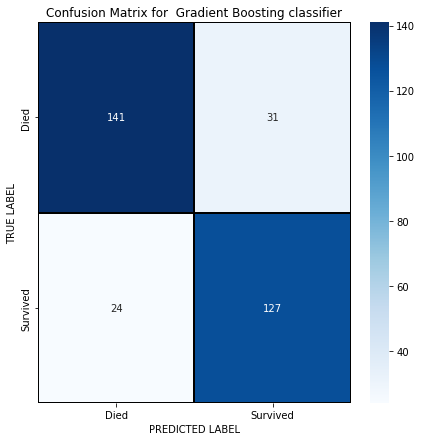

In [116]:
cm = confusion_matrix(y_test,pred_gb)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

# Cross Validation Score for all the model

In [117]:
from sklearn.model_selection import cross_val_score

# CV Score for Logistic Regression

In [118]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=9).mean())

CV score for Logistic Regression:  0.7942966075319017


# CV Score for Decision Tree Classifier

In [119]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=9).mean())

CV score for Decision Tree Classifier:  0.8129240585122938


# CV Score for Random Forest Classifier

In [120]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=9).mean())

CV score for Random forest Classifier:  0.8409119203236851


# CV Score for Support Vector Classifier

In [121]:
print('CV score for Support Vector  Classifier: ',cross_val_score(svc,x,y,cv=9).mean())

CV score for Support Vector  Classifier:  0.7952147525676937


# CV Score for KNN Classifier

In [122]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=9).mean())

CV score for KNN Classifier:  0.8297852474323063


# CV Score for Gradient Boosting Classifier

In [123]:
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=9).mean())

CV score for Gradient Boosting Classifier:  0.834368191721133


From all the above scores we found that, Gradient Boosting classifier is working better

NOw we will do Hyper Parameter tuning with GridSearch CV

# Hyper parameter tuning

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [125]:
gb=GradientBoostingClassifier(random_state=42)

In [126]:
parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [127]:
gcv_pred=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8606811145510835

# ROC-AUC Curve

In [128]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

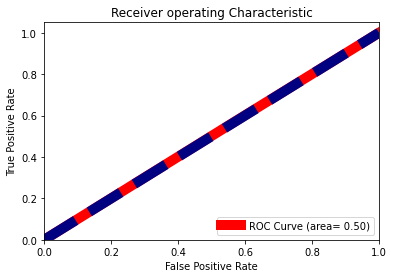

In [130]:
plt.figure()
plt.plot(fpr,tpr,color="red",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating Characteristic")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate.

# Saving the Model

In [139]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(pred,open(filename,'wb'))